In [2]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sb

format = '%d-%m-%Y %H:%M:%S.%f'

In [3]:
df = pd.read_csv('BPI_Challenge_2012-results.csv')
df

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp,most occuring next event,avg time in milliseconds
0,44964012621824,206324,2012-02-03T17:17:11.047+01:00,2500,A_SUBMITTED,COMPLETE,03-02-2012 17:17:11.047,A_PARTLYSUBMITTED,571.542254
1,44964012621825,206324,2012-02-03T17:17:11.047+01:00,2500,A_PARTLYSUBMITTED,COMPLETE,03-02-2012 17:17:11.323,W_Afhandelen leads,25976.906250
2,44964012621826,206324,2012-02-03T17:17:11.047+01:00,2500,A_DECLINED,COMPLETE,03-02-2012 17:17:42.964,W_Afhandelen leads,22711.979167
3,44968307589120,206327,2012-02-03T17:23:41.949+01:00,6000,A_SUBMITTED,COMPLETE,03-02-2012 17:23:41.949,A_PARTLYSUBMITTED,571.542254
4,44968307589121,206327,2012-02-03T17:23:41.949+01:00,6000,A_PARTLYSUBMITTED,COMPLETE,03-02-2012 17:23:42.504,W_Afhandelen leads,25976.906250
5,44968307589122,206327,2012-02-03T17:23:41.949+01:00,6000,A_PREACCEPTED,COMPLETE,03-02-2012 17:24:23.379,W_Completeren aanvraag,650.886364
6,44968307589123,206327,2012-02-03T17:23:41.949+01:00,6000,W_Completeren aanvraag,SCHEDULE,03-02-2012 17:24:24.052,W_Completeren aanvraag,69764.781563
7,44972602556416,206330,2012-02-03T17:24:30.409+01:00,2500,A_SUBMITTED,COMPLETE,03-02-2012 17:24:30.409,A_PARTLYSUBMITTED,571.542254
8,44972602556417,206330,2012-02-03T17:24:30.409+01:00,2500,A_PARTLYSUBMITTED,COMPLETE,03-02-2012 17:24:30.620,W_Afhandelen leads,25976.906250
9,44972602556418,206330,2012-02-03T17:24:30.409+01:00,2500,A_DECLINED,COMPLETE,03-02-2012 17:25:04.870,W_Afhandelen leads,22711.979167


# TIME ERROR

In [4]:
df['event time:timestamp'] = pd.to_datetime(df['event time:timestamp'])

In [5]:
df['time_until_next'] = df['event time:timestamp'].shift(-1) - df['event time:timestamp']

In [6]:
lst=[]
for x in range(len(df)):
    sec = df['time_until_next'][x].total_seconds()
    lst.append(sec)

In [7]:
df['time_until_next'] = lst

In [8]:
df['time_until_next'] = df['time_until_next']*1000

In [9]:
df

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp,most occuring next event,avg time in milliseconds,time_until_next
0,44964012621824,206324,2012-02-03T17:17:11.047+01:00,2500,A_SUBMITTED,COMPLETE,2012-03-02 17:17:11.047,A_PARTLYSUBMITTED,571.542254,276.0
1,44964012621825,206324,2012-02-03T17:17:11.047+01:00,2500,A_PARTLYSUBMITTED,COMPLETE,2012-03-02 17:17:11.323,W_Afhandelen leads,25976.906250,31641.0
2,44964012621826,206324,2012-02-03T17:17:11.047+01:00,2500,A_DECLINED,COMPLETE,2012-03-02 17:17:42.964,W_Afhandelen leads,22711.979167,358985.0
3,44968307589120,206327,2012-02-03T17:23:41.949+01:00,6000,A_SUBMITTED,COMPLETE,2012-03-02 17:23:41.949,A_PARTLYSUBMITTED,571.542254,555.0
4,44968307589121,206327,2012-02-03T17:23:41.949+01:00,6000,A_PARTLYSUBMITTED,COMPLETE,2012-03-02 17:23:42.504,W_Afhandelen leads,25976.906250,40875.0
5,44968307589122,206327,2012-02-03T17:23:41.949+01:00,6000,A_PREACCEPTED,COMPLETE,2012-03-02 17:24:23.379,W_Completeren aanvraag,650.886364,673.0
6,44968307589123,206327,2012-02-03T17:23:41.949+01:00,6000,W_Completeren aanvraag,SCHEDULE,2012-03-02 17:24:24.052,W_Completeren aanvraag,69764.781563,6357.0
7,44972602556416,206330,2012-02-03T17:24:30.409+01:00,2500,A_SUBMITTED,COMPLETE,2012-03-02 17:24:30.409,A_PARTLYSUBMITTED,571.542254,211.0
8,44972602556417,206330,2012-02-03T17:24:30.409+01:00,2500,A_PARTLYSUBMITTED,COMPLETE,2012-03-02 17:24:30.620,W_Afhandelen leads,25976.906250,34250.0
9,44972602556418,206330,2012-02-03T17:24:30.409+01:00,2500,A_DECLINED,COMPLETE,2012-03-02 17:25:04.870,W_Afhandelen leads,22711.979167,1126693.0


In [10]:
y_true = df['time_until_next'][:47822]
y_pred = df['avg time in milliseconds'][:47822]

In [11]:
rmse = mean_squared_error(y_true, y_pred, squared=False)
rmse

166732162.70610297

In [12]:
r2_score(y_true, y_pred)

7.792457116240215e-07

# EVENT ERROR

In [47]:
df_event = df['event concept:name'].to_numpy()
df_pred = df['most occuring next event'].to_numpy()
df_pred
df

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp,most occuring next event,avg time in milliseconds,time_until_next
0,44964012621824,206324,2012-02-03T17:17:11.047+01:00,2500,A_SUBMITTED,COMPLETE,2012-03-02 17:17:11.047,A_PARTLYSUBMITTED,571.542254,276.0
1,44964012621825,206324,2012-02-03T17:17:11.047+01:00,2500,A_PARTLYSUBMITTED,COMPLETE,2012-03-02 17:17:11.323,W_Afhandelen leads,25976.906250,31641.0
2,44964012621826,206324,2012-02-03T17:17:11.047+01:00,2500,A_DECLINED,COMPLETE,2012-03-02 17:17:42.964,W_Afhandelen leads,22711.979167,358985.0
3,44968307589120,206327,2012-02-03T17:23:41.949+01:00,6000,A_SUBMITTED,COMPLETE,2012-03-02 17:23:41.949,A_PARTLYSUBMITTED,571.542254,555.0
4,44968307589121,206327,2012-02-03T17:23:41.949+01:00,6000,A_PARTLYSUBMITTED,COMPLETE,2012-03-02 17:23:42.504,W_Afhandelen leads,25976.906250,40875.0
5,44968307589122,206327,2012-02-03T17:23:41.949+01:00,6000,A_PREACCEPTED,COMPLETE,2012-03-02 17:24:23.379,W_Completeren aanvraag,650.886364,673.0
6,44968307589123,206327,2012-02-03T17:23:41.949+01:00,6000,W_Completeren aanvraag,SCHEDULE,2012-03-02 17:24:24.052,W_Completeren aanvraag,69764.781563,6357.0
7,44972602556416,206330,2012-02-03T17:24:30.409+01:00,2500,A_SUBMITTED,COMPLETE,2012-03-02 17:24:30.409,A_PARTLYSUBMITTED,571.542254,211.0
8,44972602556417,206330,2012-02-03T17:24:30.409+01:00,2500,A_PARTLYSUBMITTED,COMPLETE,2012-03-02 17:24:30.620,W_Afhandelen leads,25976.906250,34250.0
9,44972602556418,206330,2012-02-03T17:24:30.409+01:00,2500,A_DECLINED,COMPLETE,2012-03-02 17:25:04.870,W_Afhandelen leads,22711.979167,1126693.0


In [50]:
event = df['event concept:name'].shift(periods= -1)[:47822]
pred = df['most occuring next event'][:47822]

combine = [event, pred]
df2 = pd.concat(combine, axis = 1)
df2['mask'] = np.where(df2['most occuring next event'] == df2['event concept:name'], 'True', 'False') 
df2['mask'].value_counts()
df2_accuracy = 14274/df2['mask'].count()
df2_accuracy

0.2984818702689139

In [22]:
#event
np.unique(event)

array(['A_ACCEPTED', 'A_ACTIVATED', 'A_APPROVED', 'A_CANCELLED',
       'A_DECLINED', 'A_FINALIZED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED',
       'A_REGISTERED', 'A_SUBMITTED', 'O_ACCEPTED', 'O_CANCELLED',
       'O_CREATED', 'O_DECLINED', 'O_SELECTED', 'O_SENT', 'O_SENT_BACK',
       'W_Afhandelen leads', 'W_Beoordelen fraude',
       'W_Completeren aanvraag', 'W_Nabellen incomplete dossiers',
       'W_Nabellen offertes', 'W_Valideren aanvraag'], dtype=object)

In [23]:
np.unique(pred)

array(['A_ACTIVATED', 'A_APPROVED', 'A_DECLINED', 'A_FINALIZED',
       'A_PARTLYSUBMITTED', 'A_REGISTERED', 'A_SUBMITTED', 'O_CREATED',
       'O_SELECTED', 'O_SENT', 'W_Afhandelen leads',
       'W_Completeren aanvraag', 'W_Nabellen offertes',
       'W_Valideren aanvraag'], dtype=object)

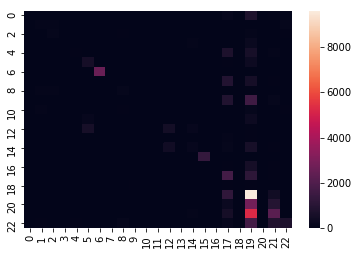

In [24]:
sns.heatmap(confusion_matrix(event, pred))

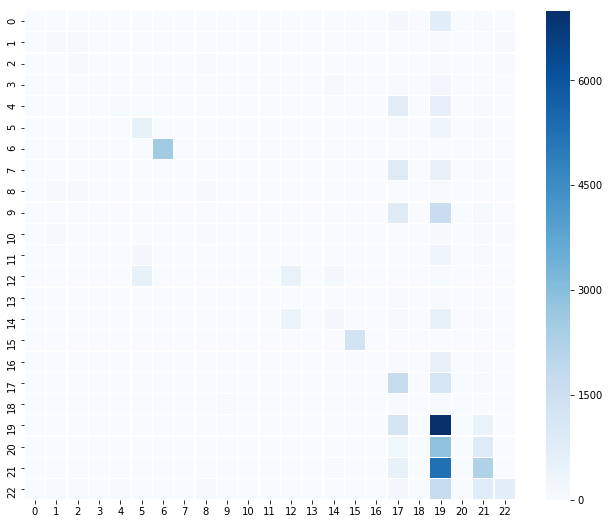

In [25]:
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(confusion_matrix(event, pred), cmap="Blues", vmin= 0, vmax=7000,
           linewidth=0.3)
plt.show()

In [38]:
print(classification_report(event,pred))

C:\Users\20190922\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20190922\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

                    A_ACCEPTED       0.00      0.00      0.00      1014
                   A_ACTIVATED       0.28      0.28      0.28       375
                    A_APPROVED       0.32      0.32      0.32       375
                   A_CANCELLED       0.00      0.00      0.00       388
                    A_DECLINED       0.46      0.04      0.08      1483
                   A_FINALIZED       0.42      0.57      0.48       991
             A_PARTLYSUBMITTED       0.99      0.99      0.99      2618
                 A_PREACCEPTED       0.00      0.00      0.00      1483
                  A_REGISTERED       0.30      0.30      0.30       375
                   A_SUBMITTED       0.06      0.00      0.01      2617
                    O_ACCEPTED       0.00      0.00      0.00       375
                   O_CANCELLED       0.00      0.00      0.00       535
                     O_CREATED       0.51      0.38      0.44  

C:\Users\20190922\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,event concept:name,most occuring next event,mask
0,A_SUBMITTED,A_PARTLYSUBMITTED,False
1,A_PARTLYSUBMITTED,W_Afhandelen leads,False
2,A_DECLINED,W_Afhandelen leads,False
3,A_SUBMITTED,A_PARTLYSUBMITTED,False
4,A_PARTLYSUBMITTED,W_Afhandelen leads,False
5,A_PREACCEPTED,W_Completeren aanvraag,False
6,W_Completeren aanvraag,W_Completeren aanvraag,True
7,A_SUBMITTED,A_PARTLYSUBMITTED,False
8,A_PARTLYSUBMITTED,W_Afhandelen leads,False
9,A_DECLINED,W_Afhandelen leads,False
